In [14]:
import shap
import pickle
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

import sys
sys.path.append("/Users/muhammaddaffarobani/Documents/personal_research/smt/reference/shapley-regression-master")
from shapreg import removal, games, shapley

In [10]:
# Load data
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
num_features = X.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
# d_train = lgb.Dataset(X_train, label=y_train)
# d_test = lgb.Dataset(X_test, label=y_test)

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Make model callable
model_lam = lambda x: model.predict(x)

# Model extension
marginal_extension = removal.MarginalExtension(X_test.values[:512], model_lam)

In [16]:
# Set up game (single prediction)
instance = X.values[0]
game = games.PredictionGame(marginal_extension, instance)

In [17]:
# Run estimator
explanation = shapley.ShapleyRegression(game, batch_size=32)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  0%|          | 0/1 [00:00<?, ?it/s]X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid f

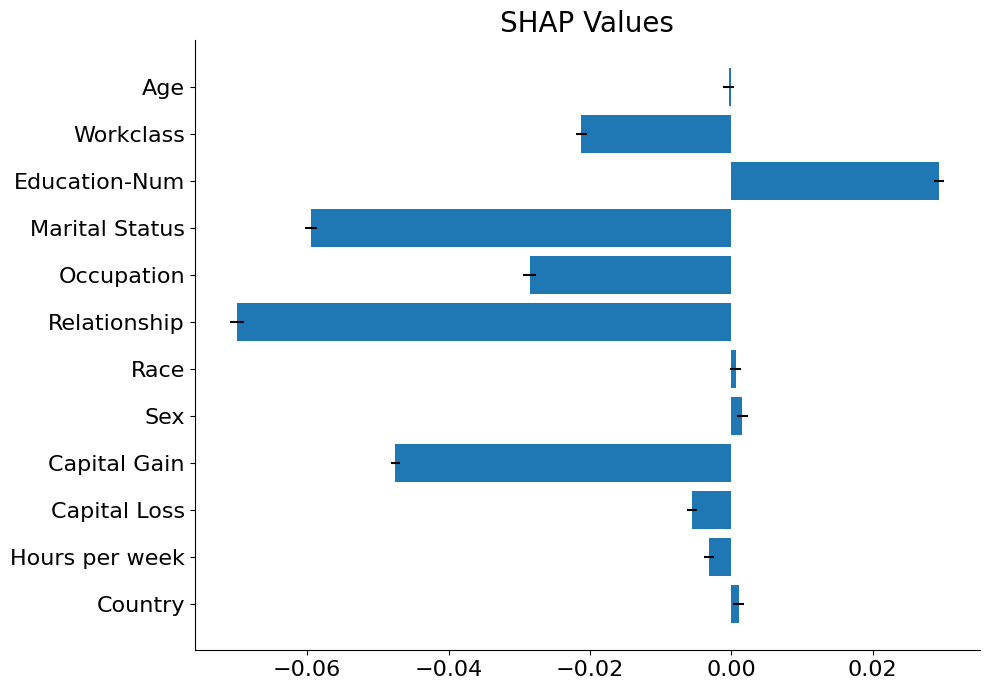

In [18]:
# Plot with 95% confidence intervals
feature_names = X.columns.tolist()
explanation.plot(feature_names, title='SHAP Values', sort_features=False)

In [19]:
explanation

Shapley Values(
  (Mean): [-0.00 -0.02  0.03 -0.06 -0.03 -0.07  0.00  0.00 -0.05 -0.01 -0.00  0.00]
  (Std):  [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
)